# K-means clustering algorithm to group customers of a retail store based on their purchase history.

### Importing all the necessary libraries and modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Reading the training dataset and preprocessing it:

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### One-hot encoding 'Gender' feature and scaling the data:

In [4]:
df_encoded=pd.get_dummies(df,columns=['Gender'],prefix='gender',dtype='int')
df_encoded=df_encoded.drop(columns=['CustomerID'])

In [5]:
df_encoded.head(5)

,Age,Annual Income (k$),Spending Score (1-100),gender_Female,gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [6]:
continuous_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
binary_columns = ['gender_Female', 'gender_Male']
scaler = StandardScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])

In [7]:
df_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),gender_Female,gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0


In [8]:
df_encoded.describe()

,Age,Annual Income (k$),Spending Score (1-100),gender_Female,gender_Male
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16,0.560000,0.440000
std,1.002509e+00,1.002509e+00,1.002509e+00,0.497633,0.497633
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,0.000000,0.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,1.000000,0.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.000000,1.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,1.000000,1.000000


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     200 non-null    float64
 1   Annual Income (k$)      200 non-null    float64
 2   Spending Score (1-100)  200 non-null    float64
 3   gender_Female           200 non-null    int32  
 4   gender_Male             200 non-null    int32  
dtypes: float64(3), int32(2)
memory usage: 6.4 KB


### Visualising co-relation b/w features:

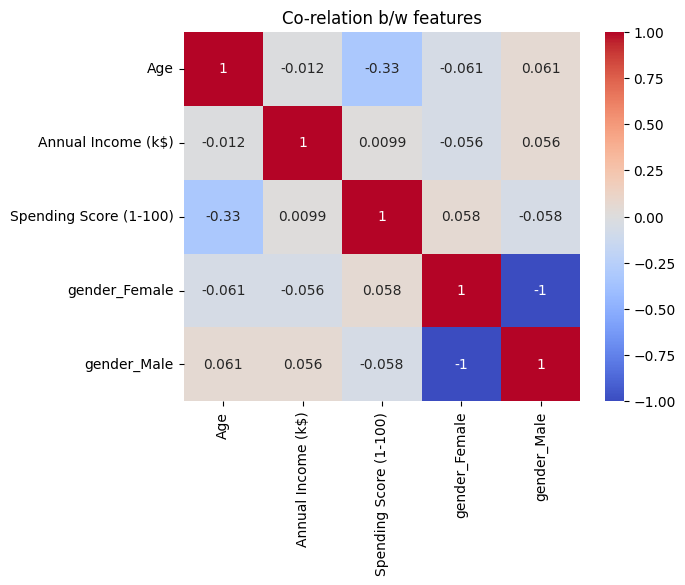

In [10]:
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm')
plt.title('Co-relation b/w features')
plt.show()

### Training the model:

##### Performing the elbow method for determining the optimal number of clusters:

In [11]:
x=df_encoded.values
clusters=[i for i in range(1,11)]
squared_errors=[]
for cluster in clusters:
    km=KMeans(n_clusters=cluster,random_state=42)
    km.fit(x)
    squared_errors.append(km.inertia_)

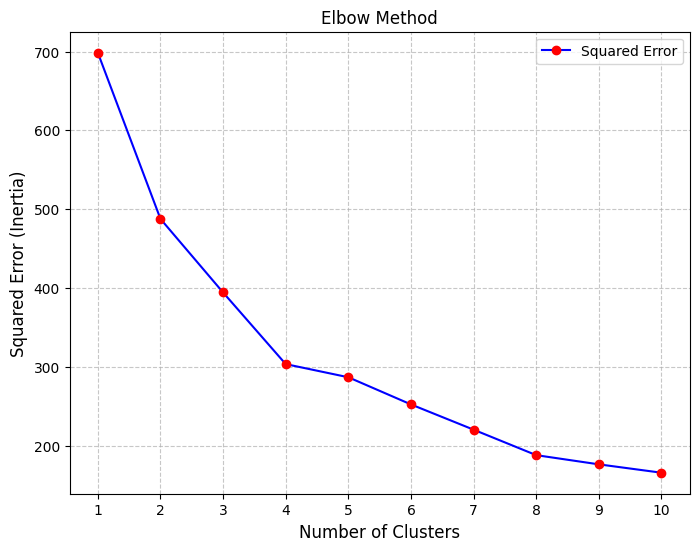

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(clusters, squared_errors, marker='o',mec='r',mfc='r',linestyle='-', color='b', label='Squared Error')
plt.title('Elbow Method for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Squared Error (Inertia)', fontsize=12)
plt.xticks(clusters)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.title('Elbow Method')
plt.show()

In [13]:
kmeans=KMeans(n_clusters=4,random_state=42)
predictions=kmeans.fit_predict(x)

### Dimensionality reduction and visualization of clustered data:

In [14]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = predictions

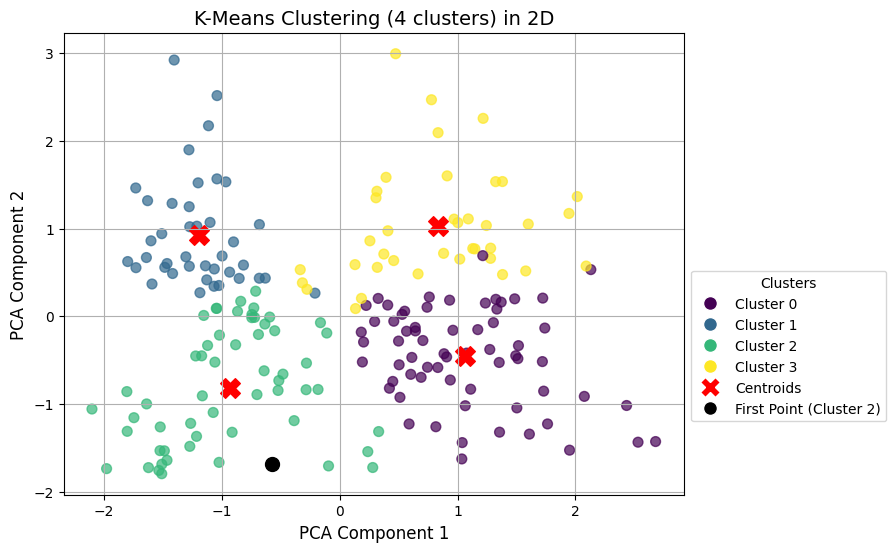

In [15]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.7)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
first_point_cluster = predictions[0]
plt.scatter(pca_df.loc[0, 'PCA1'], pca_df.loc[0, 'PCA2'], c='black', s=100, marker='o', label=f'First Point (Cluster {first_point_cluster})')
plt.title('K-Means Clustering (4 clusters) in 2D', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

norm = plt.Normalize(vmin=np.min(predictions), vmax=np.max(predictions))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

unique_clusters = np.unique(predictions)
cluster_labels = [f'Cluster {i}' for i in unique_clusters]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sm.to_rgba(i), markersize=10) for i in unique_clusters]

centroid_handle = plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='red', markersize=15)
first_point_handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)

handles.extend([centroid_handle, first_point_handle])
labels = cluster_labels + ['Centroids', f'First Point (Cluster {first_point_cluster})']

plt.legend(handles=handles, labels=labels, title='Clusters', loc='best', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

### Adding 'Category' column to the original dataset:

In [16]:
df_with_clusters = pd.concat([df, pca_df['Cluster']], axis=1)

In [17]:
df_with_clusters=df_with_clusters.rename(columns={'Cluster':'Category'})

In [18]:
df_with_clusters.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Category
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3
199,200,Male,30,137,83,1


### Determining the characteristics that group the customers:

In [19]:
centroids_original_scale = scaler.inverse_transform(centroids[:,:3])
category_info=pd.DataFrame(data=centroids_original_scale,columns=['Avg Age','Avg Annual Income(k$)','Avg Spending Score(1-100)'])
category_info['Category']=[0,1,2,3]
category_info.set_index('Category')
category_info['Avg Age']=category_info['Avg Age'].round(0).astype('int64')
category_info[['Avg Annual Income(k$)','Avg Spending Score(1-100)']]=category_info[['Avg Annual Income(k$)','Avg Spending Score(1-100)']].round(2)

In [20]:
category_info

,Avg Age,Avg Annual Income(k$),Avg Spending Score(1-100),Category
0,54,47.71,39.97,0
1,33,86.10,81.53,1
2,25,40.00,60.30,2
3,39,86.50,19.58,3


### Results:
#####    Category 0: Older customers (Avg Age: 54) with moderate income and below-average spending. Likely cautious spenders focused on necessities.
#####    Category 1: Younger, high-income customers (Avg Age: 33) with high spending. Likely frequent shoppers spending on premium or luxury items.
#####    Category 2: Very young, lower-income customers (Avg Age: 25) with moderate spending. Likely budget-conscious but spend selectively.
#####    Category 3: Middle-aged, high-income customers (Avg Age: 39) with very low spending. Likely conservative or selective buyers.